In [1]:
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [27]:
csv_file = '../data/RtmSimulation_kickstart.csv'
dataframe = pd.read_csv(csv_file, header=0, sep=',', index_col=0)
# print(dataframe.head())
column_names = list(dataframe.columns)
print(f'column_names: {column_names}')
matching_result = re.findall('w*', ' '.join(column_names))
wavelength_columns = [x for x in column_names if x.startswith('w')][1:]
sentinel_columns = [x for x in column_names if x.startswith('Sentinel')]
print(f'wavelength_columns: {wavelength_columns} \nsentinel_columns: {sentinel_columns}')
# print(dataframe.index)
# print(dataframe.shape)  # 1000x2114, rows x columns

column_names: ['lai', 'wetness', 'treeSpecies', 'Sentinel_2A_492.4', 'Sentinel_2A_559.8', 'Sentinel_2A_664.6', 'Sentinel_2A_704.1', 'Sentinel_2A_740.5', 'Sentinel_2A_782.8', 'Sentinel_2A_832.8', 'Sentinel_2A_864.7', 'Sentinel_2A_1613.7', 'Sentinel_2A_2202.4', 'w400', 'w401', 'w402', 'w403', 'w404', 'w405', 'w406', 'w407', 'w408', 'w409', 'w410', 'w411', 'w412', 'w413', 'w414', 'w415', 'w416', 'w417', 'w418', 'w419', 'w420', 'w421', 'w422', 'w423', 'w424', 'w425', 'w426', 'w427', 'w428', 'w429', 'w430', 'w431', 'w432', 'w433', 'w434', 'w435', 'w436', 'w437', 'w438', 'w439', 'w440', 'w441', 'w442', 'w443', 'w444', 'w445', 'w446', 'w447', 'w448', 'w449', 'w450', 'w451', 'w452', 'w453', 'w454', 'w455', 'w456', 'w457', 'w458', 'w459', 'w460', 'w461', 'w462', 'w463', 'w464', 'w465', 'w466', 'w467', 'w468', 'w469', 'w470', 'w471', 'w472', 'w473', 'w474', 'w475', 'w476', 'w477', 'w478', 'w479', 'w480', 'w481', 'w482', 'w483', 'w484', 'w485', 'w486', 'w487', 'w488', 'w489', 'w490', 'w491', 'w49

In [21]:
dataframe.isnull().sum().sum()  # 0
nan_result = dict(dataframe.isnull().sum())
nan_result = {k: nan_result[k] for k in nan_result if nan_result[k] > 0}
print(f'nan_result: {nan_result}')

nan_result: {'Sentinel_2A_704.1': 10, 'Sentinel_2A_740.5': 10, 'Sentinel_2A_782.8': 10, 'w469': 10, 'w470': 5, 'w471': 5, 'w473': 8, 'w474': 8}


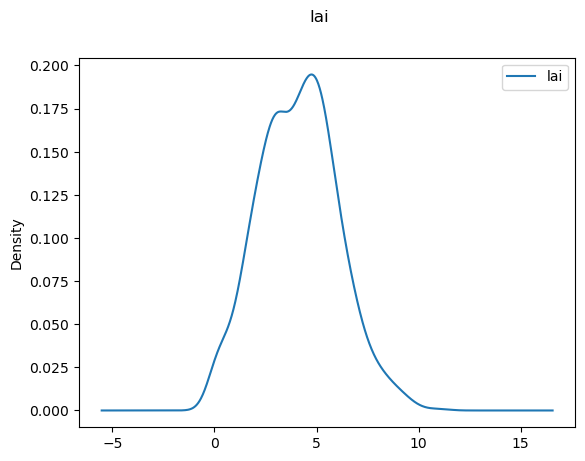

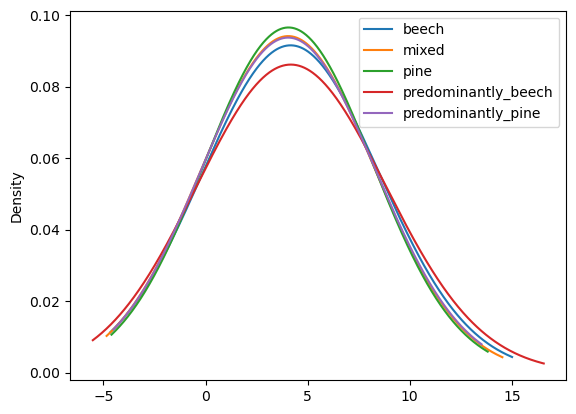

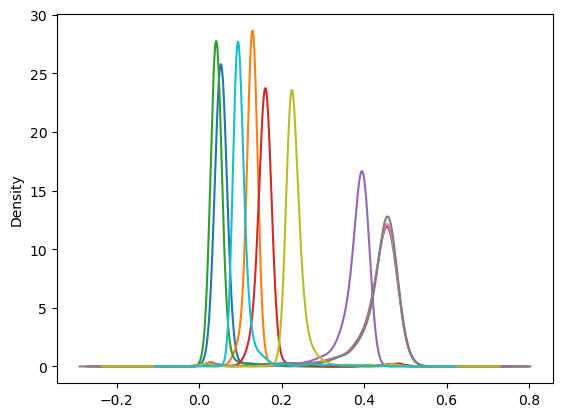

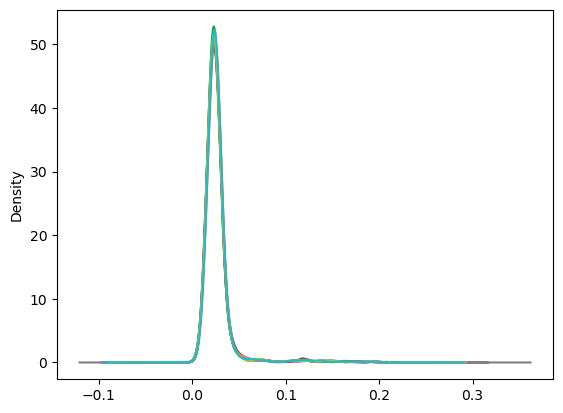

In [44]:
column_name = 'lai'
column_content = dataframe[column_name]
column_content.plot(kind='density', title=column_name, legend=True, subplots=True)
plt.show()

column_name = "treeSpecies"
column_content = dataframe[column_name]
column_content.groupby(column_content).count()

group_by = dataframe.groupby('treeSpecies')
names, groups = zip(*group_by)
for name, group in group_by:
    group['lai'].plot(kind='density', legend=True, label=name)
plt.show()

for sentinel in sentinel_columns:
    dataframe[sentinel].plot(kind='density', label=sentinel)
plt.show()

for wavelength in wavelength_columns[:10]:
    dataframe[wavelength].plot(kind='density', label=wavelength)
plt.show()